In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
df = pd.read_csv("retail_sales_dataset.csv")
print("Dataset Loded Successfully")
df.head()

Dataset Loded Successfully


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100


In [7]:
# Checking for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


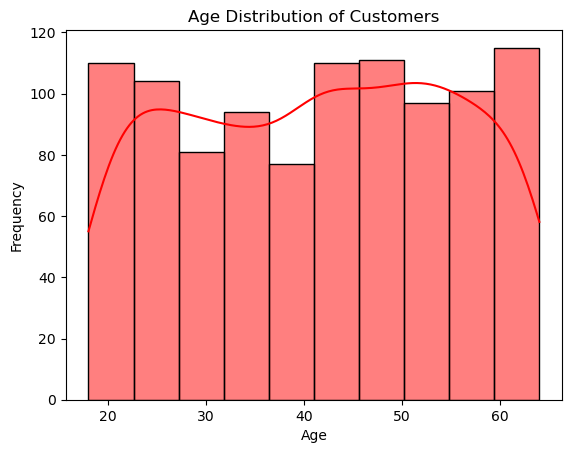

In [44]:
# Distribution of Age
sns.histplot(df['Age'].dropna(), bins=10, kde=True, color='Red')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15308\510745687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='coolwarm')


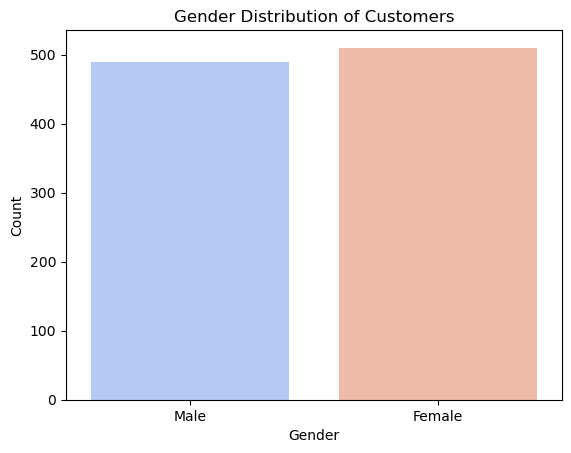

In [17]:
# Gender Distribution
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15308\897802918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Product Category'].value_counts().index, y=df['Product Category'].value_counts(), palette='viridis')


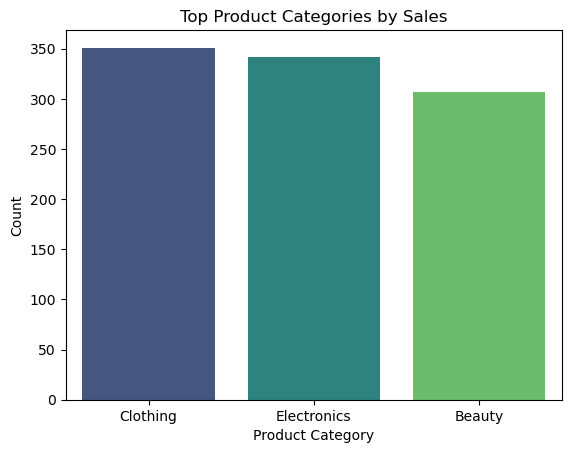

In [19]:
# Top Product Categories by Sales
sns.barplot(x=df['Product Category'].value_counts().index, y=df['Product Category'].value_counts(), palette='viridis')
plt.title('Top Product Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

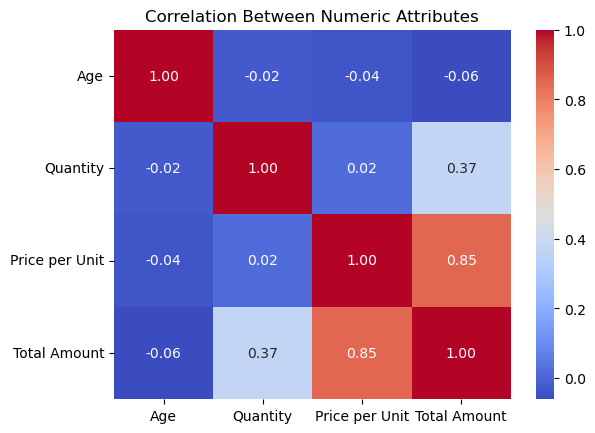

In [21]:
# Correlation heatmap
sns.heatmap(df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numeric Attributes')
plt.show()


In [23]:
# Customer Segmentation Based on Spending Category
def categorize_spending(amount):
    if amount >= df['Total Amount'].quantile(0.75):
        return 'High'
    elif amount >= df['Total Amount'].quantile(0.50):
        return 'Medium'
    else:
        return 'Low'

df['Spending_Category'] = df['Total Amount'].apply(categorize_spending)
print("Customer Segmentation Based on Spending Category:")
df[['Customer ID', 'Total Amount', 'Spending_Category']].head()


Customer Segmentation Based on Spending Category:


,Customer ID,Total Amount,Spending_Category
0,CUST001,150,Medium
1,CUST002,1000,High
2,CUST003,30,Low
3,CUST004,500,Medium
4,CUST005,100,Low


C:\Users\HP\AppData\Local\Temp\ipykernel_15308\2254791853.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Spending_Category', data=df, palette='viridis')


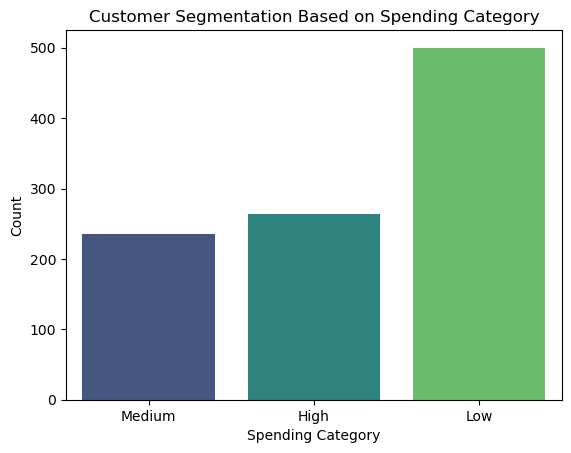

In [26]:
# plot the spending category
sns.countplot(x='Spending_Category', data=df, palette='viridis')
plt.title('Customer Segmentation Based on Spending Category')
plt.xlabel('Spending Category')
plt.ylabel('Count')
plt.show()